In [1]:
# To read the dataset
import pandas as pd
import numpy  as np

train=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\Amazon Ml Engineer\\train.csv")
test =pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\Amazon Ml Engineer\\test.csv")

In [3]:
train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [4]:
test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [ ]:
# We will combine both train and test data sets and we will perform EDA and then we will perform the clustering part

In [2]:
train['source']='train'
test['source']='test'

train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0,train
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0,train
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0,train
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0,train
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0,train


In [6]:
test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,source
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA,test
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA,test
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA,test
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA,test
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA,test


In [15]:
print(train.shape,test.shape)

(10738, 13) (7160, 12)


In [3]:
# Concenating both the data sets
data =pd.concat([train,test],ignore_index=True)
data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0.0,train
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0.0,train
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0.0,train
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0.0,train
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0.0,train


In [8]:
data.tail()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
17893,csid_17894,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717,C,AA,NaN,test
17894,csid_17895,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245,C,BA,NaN,test
17895,csid_17896,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082,C,BA,NaN,test
17896,csid_17897,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493,C,BA,NaN,test
17897,csid_17898,10.698835,12.173331,0.475469,0.014124,23.358252,10.805826,1.571717,0.133973,B,BA,NaN,test


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       17898 non-null  object 
 1   customer_visit_score              17898 non-null  float64
 2   customer_product_search_score     17827 non-null  float64
 3   customer_ctr_score                17898 non-null  float64
 4   customer_stay_score               17845 non-null  float64
 5   customer_frequency_score          17898 non-null  float64
 6   customer_product_variation_score  17809 non-null  float64
 7   customer_order_score              17791 non-null  float64
 8   customer_affinity_score           17898 non-null  float64
 9   customer_active_segment           17863 non-null  object 
 10  X1                                17836 non-null  object 
 11  customer_category                 10738 non-null  float64
 12  sour

In [6]:
data[data['customer_category']==0].shape

(9443, 13)

In [7]:
data[data['customer_category']==1].shape

(1295, 13)

In [ ]:
From the above two dimensions we could see that  customer category 0 is having 9443 records where as customer category 1 is having 1295
records.
This implies that the dataset is imbalanced one.
We need to apply smoting technique in order to balance this data set.

In [5]:
data.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,17898.000000,17827.000000,17898.000000,17845.000000,17898.000000,17809.000000,17791.000000,17898.000000,10738.000000
mean,19.316747,5.319298,0.149960,0.305609,2.180350,5.650726,3.213842,18.192842,0.120600
std,7.253876,1.842915,0.334059,1.103338,5.362297,2.460923,1.048263,19.644527,0.325677
min,0.568965,-0.161940,-0.615134,-0.462494,0.022957,2.718819,0.363338,-0.501215,0.000000
25%,13.815484,4.048266,0.008413,-0.030268,0.299751,4.154597,2.530803,5.486786,0.000000
50%,18.974262,5.278669,0.069732,0.032227,0.490587,4.768524,3.173650,13.415359,0.000000
75%,24.617343,6.547596,0.148614,0.156703,0.971968,6.013411,3.809134,24.265867,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,19.095799,11.388305,257.251810,1.000000


In [71]:
# To check for null values in the data set
data.apply(lambda x:sum(x.isnull()))

customer_id                            0
customer_visit_score                   0
customer_product_search_score         71
customer_ctr_score                     0
customer_stay_score                   53
customer_frequency_score               0
customer_product_variation_score      89
customer_order_score                 107
customer_affinity_score                0
customer_active_segment               35
X1                                    62
customer_category                   7160
source                                 0
dtype: int64

In [72]:
# Calculate the percent of null values in the dataset
data.isnull().sum()/data.shape[0]*100

customer_id                          0.000000
customer_visit_score                 0.000000
customer_product_search_score        0.396692
customer_ctr_score                   0.000000
customer_stay_score                  0.296122
customer_frequency_score             0.000000
customer_product_variation_score     0.497262
customer_order_score                 0.597832
customer_affinity_score              0.000000
customer_active_segment              0.195553
X1                                   0.346407
customer_category                   40.004470
source                               0.000000
dtype: float64

In [ ]:
From the above two we could identify that null values are present in Customer Product Search store,Customer Stay Score,
Customer Production Variation Score,Order Score,Customer Active Segment and X1.
Customer Product Search Store have 40% percent of missing values
Customer Stay Score have 29% percent of missing values
Customer product variation score have 49% of missing values
Customer order score have 60% of missing values
Customer Active Segment have 19.5% of missing values
X1  have 34.6% of missing values

As most of the data is having 50% of the data missing values ,we need to impute them based on further analysis.

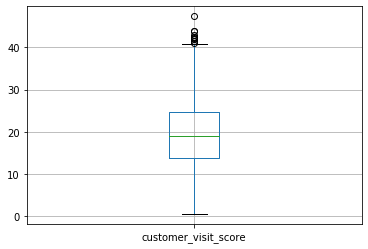

In [24]:
data.boxplot(column='customer_visit_score')

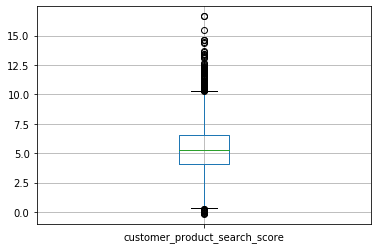

In [25]:
data.boxplot(column='customer_product_search_score')

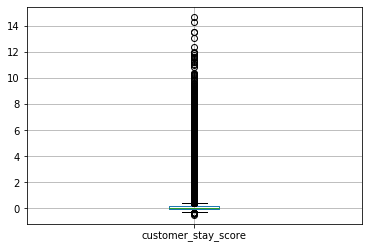

In [26]:
data.boxplot(column='customer_stay_score')

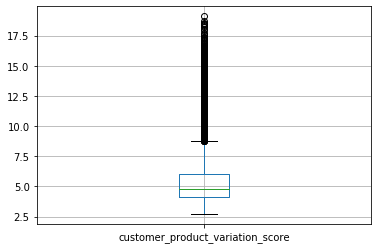

In [27]:
data.boxplot(column='customer_product_variation_score')

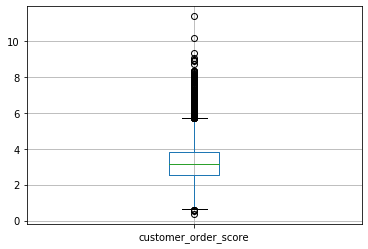

In [28]:
data.boxplot(column='customer_order_score')

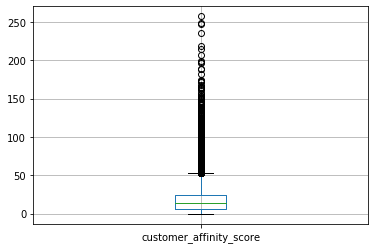

In [29]:
data.boxplot(column='customer_affinity_score')

In [ ]:
From the above boxplots we could see that all of the columns are having mostly outliers,we need to analyze these outliers

In all the columns , customer_stay_score is having most of the outliers which means customers are spending more than average time
on the site

In [ ]:
Skewness of the data

In [32]:
data.skew()

customer_visit_score                0.129677
customer_product_search_score       0.244059
customer_ctr_score                  3.651823
customer_stay_score                 5.744164
customer_frequency_score            4.273265
customer_product_variation_score    2.014995
customer_order_score                0.647046
customer_affinity_score             2.922714
customer_category                   2.330354
dtype: float64

In [ ]:
As per the thumb rule ,we could see that customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score
,customer_affinity_score are having high skewness .


<Figure size 14400x576 with 0 Axes>

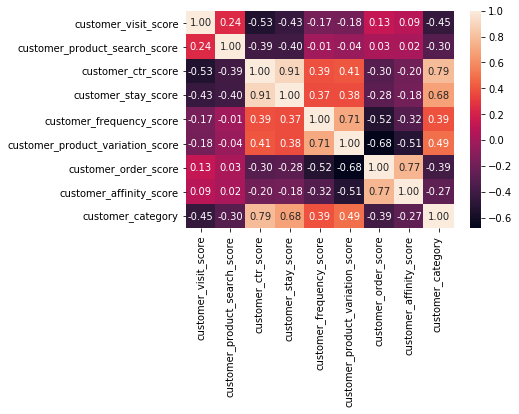

<Figure size 14400x576 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Heat Map

sns.heatmap(data.corr(),annot=True,fmt=".2f") 
plt.figure(figsize=(200,8))

In [8]:
data0=data[data['customer_category']==0]


In [9]:
data1=data[data['customer_category']==1]
data1.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
19,csid_20,12.297850,4.128526,0.472005,0.725384,5.581855,7.996984,2.064806,0.942554,B,F,1.0,train
42,csid_43,19.812574,5.788460,0.081404,0.084755,0.164644,4.265691,4.355578,26.697315,C,BA,1.0,train
61,csid_62,7.073645,2.222898,1.868179,6.076476,13.972696,7.978077,2.253698,0.136040,C,BA,1.0,train
92,csid_93,5.074714,3.232825,1.935050,6.089135,12.965956,9.922563,1.947647,-0.184121,C,F,1.0,train
93,csid_94,16.208038,4.866526,0.349939,0.895663,0.741226,7.242972,2.396141,3.793962,C,F,1.0,train


C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


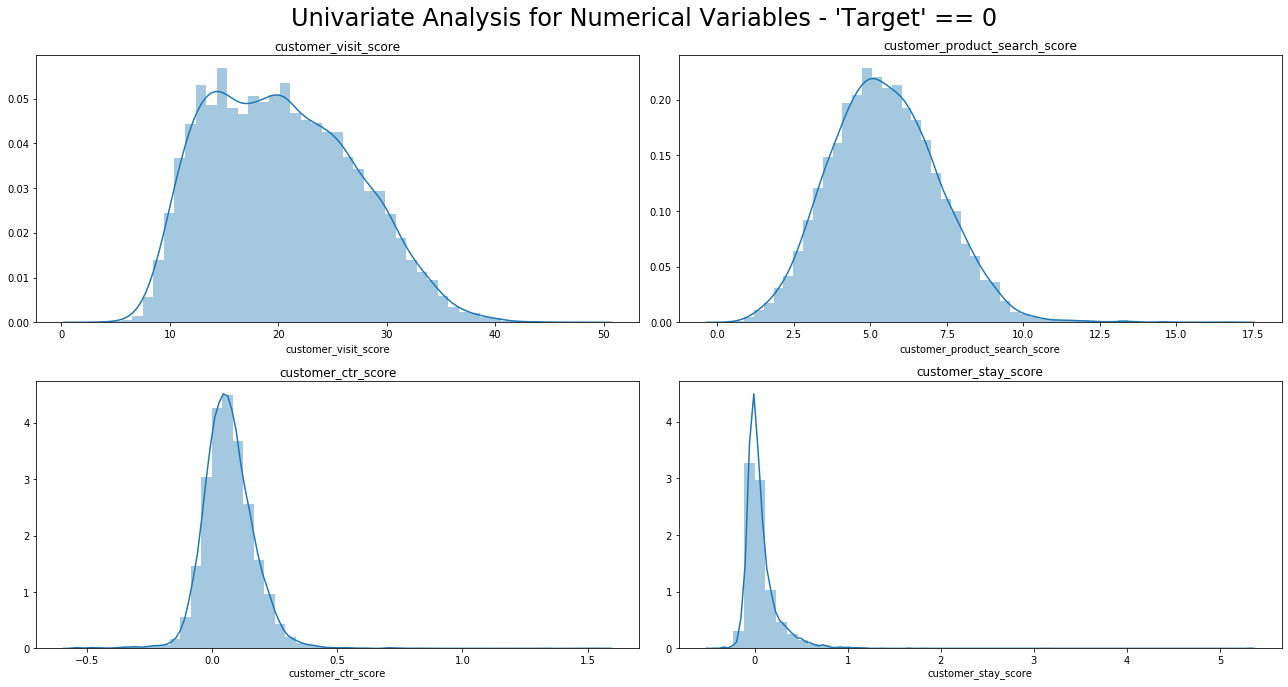

In [46]:
col=['customer_visit_score','customer_product_search_score','customer_ctr_score','customer_stay_score']
j=1
data0.dropna(subset=col,inplace=True)
plt.figure(figsize=(18,10))
for i in col:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(data0[i])
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables - \'Target\' == 0',fontsize=24)
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


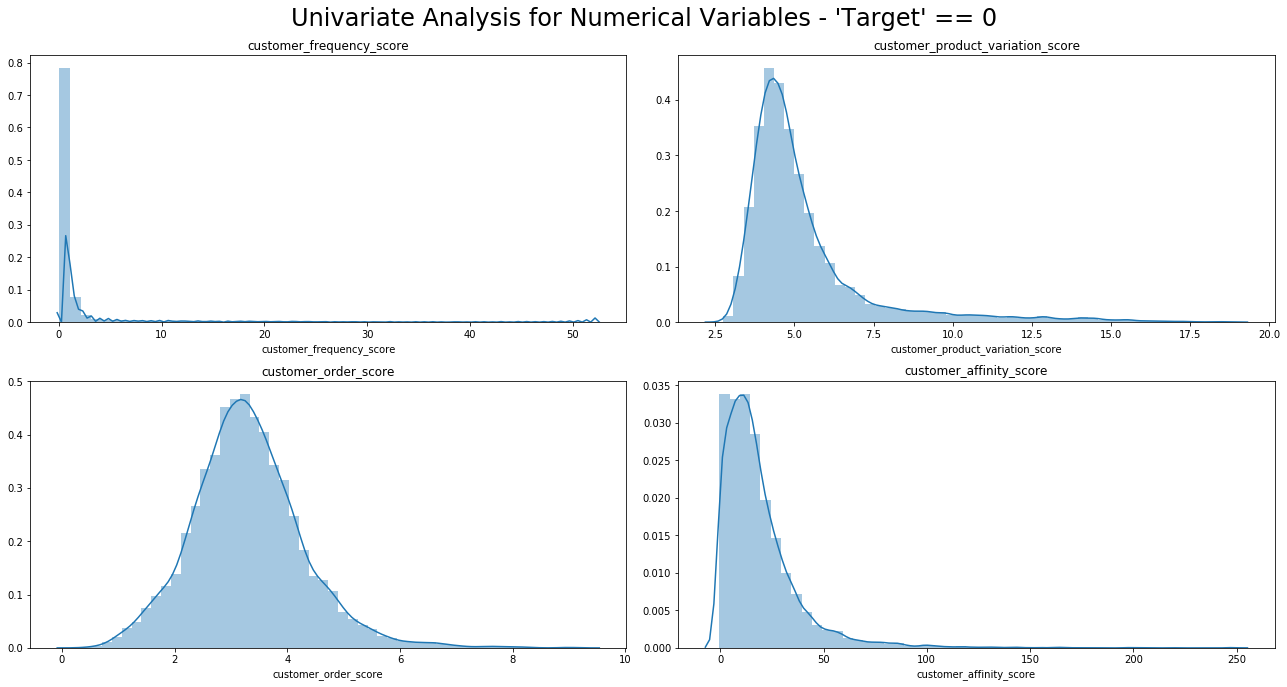

In [47]:
col=['customer_frequency_score','customer_product_variation_score','customer_order_score','customer_affinity_score']
j=1
data0.dropna(subset=col,inplace=True)
plt.figure(figsize=(18,10))
for i in col:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(data0[i])
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables - \'Target\' == 0',fontsize=24)
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


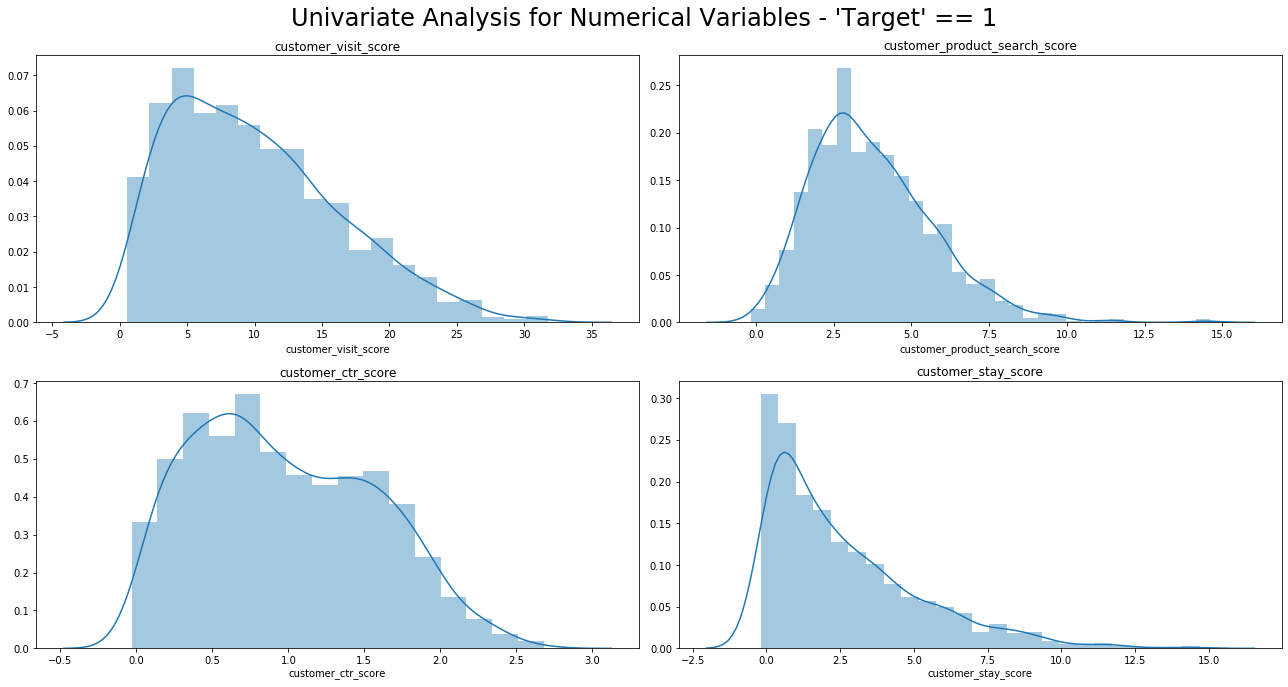

In [49]:
col=['customer_visit_score','customer_product_search_score','customer_ctr_score','customer_stay_score']
j=1
data1.dropna(subset=col,inplace=True)
plt.figure(figsize=(18,10))
for i in col:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(data1[i])
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables - \'Target\' == 1',fontsize=24)
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


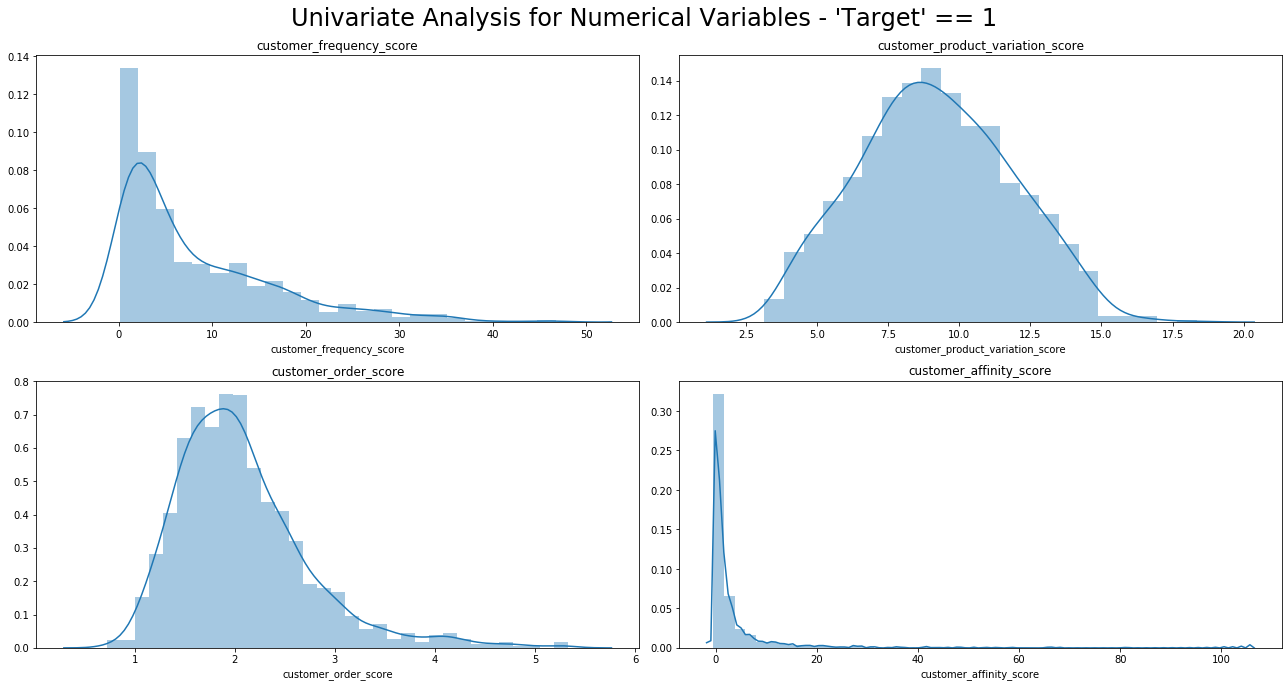

In [50]:
col=['customer_frequency_score','customer_product_variation_score','customer_order_score','customer_affinity_score']
j=1
data1.dropna(subset=col,inplace=True)
plt.figure(figsize=(18,10))
for i in col:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=12)
    sns.distplot(data1[i])
    j=j+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Univariate Analysis for Numerical Variables - \'Target\' == 1',fontsize=24)
plt.show()

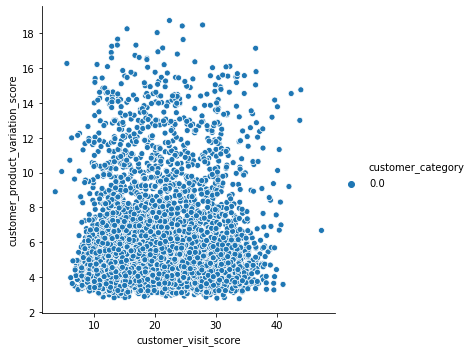

In [17]:
sns.relplot(x="customer_visit_score",y="customer_product_variation_score",hue="customer_category",data=data0)


In [ ]:
sns.relplot(x="customer_visit_score",y="customer_product_variation_score",hue="customer_category",data=data0)


In [ ]:
sns.relplot(x="customer_visit_score",y="customer_product_variation_score",hue="customer_category",data=data0)


In [ ]:
sns.relplot(x="customer_visit_score",y="customer_product_variation_score",hue="customer_category",data=data0)


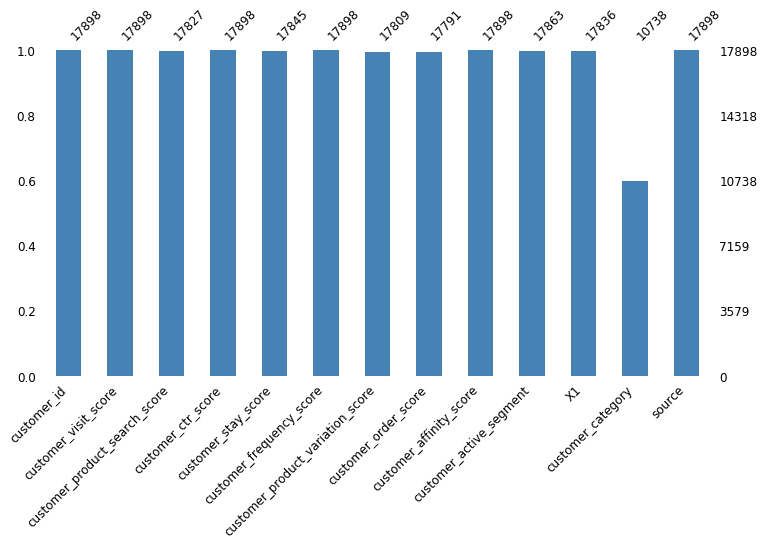

In [53]:
# Plot the data sets
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data, figsize=(12, 6), fontsize=12, color='steelblue')


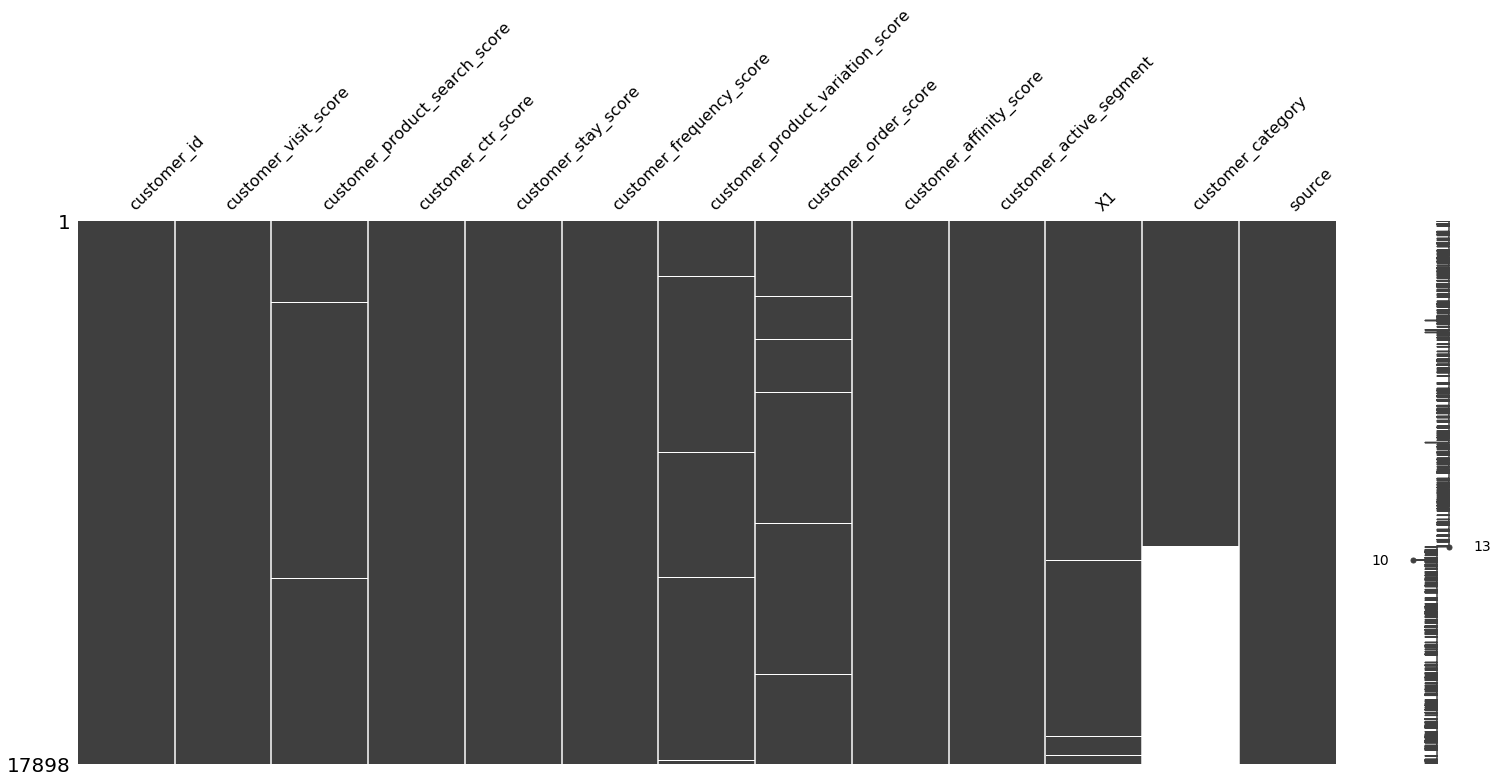

In [54]:
msno.matrix(data)

In [ ]:
From the above graph we could infer that most of the missing data we are having are completely random hence,instead of mean,median and mode
we will impute the missing values using KNN method

In [4]:
data1=data.iloc[:,1:-4]
data1.head()


,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326


In [5]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_filled = pd.DataFrame(imputer.fit_transform(data1))

df_filled

,0,1,2,3,4,5,6,7
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326
...,...,...,...,...,...,...,...,...
17893,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717
17894,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245
17895,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082
17896,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493


In [6]:
df_filled.columns=data1.columns
print(df_filled)

       customer_visit_score  customer_product_search_score  \
0                 13.168425                       9.447662   
1                 17.092979                       7.329056   
2                 17.505334                       5.143676   
3                 31.423381                       4.917740   
4                 11.909502                       4.237073   
...                     ...                            ...   
17893             18.164300                       7.240835   
17894             25.363705                       4.881059   
17895             11.160720                       5.019859   
17896             17.140020                       9.269037   
17897             10.698835                      12.173331   

       customer_ctr_score  customer_stay_score  customer_frequency_score  \
0               -0.070203            -0.139541                  0.436956   
1                0.153298            -0.102726                  0.380340   
2                0.106709  

In [17]:
df_filled.apply(lambda x:sum(x.isnull()))

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
dtype: int64

In [ ]:
Now we need to impute categorical variables, so machine learning alogorithms will understand all data as numerics ,so we will perform label encoding
and then we will impute missing data of these two columns.

In [7]:
data2 = data.iloc[:,-4:-2]
print(data2)

data2.info()

      customer_active_segment  X1
0                           C   F
1                           C   A
2                           C  BA
3                          AA   F
4                           C  AA
...                       ...  ..
17893                       C  AA
17894                       C  BA
17895                       C  BA
17896                       C  BA
17897                       B  BA

[17898 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_active_segment  17863 non-null  object
 1   X1                       17836 non-null  object
dtypes: object(2)
memory usage: 279.8+ KB


In [279]:
data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0.0,train
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0.0,train
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0.0,train
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0.0,train
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0.0,train


In [19]:
data2.apply(lambda x: sum(x.isnull()))

customer_active_segment    35
X1                         62
dtype: int64

In [14]:
data2['customer_active_segment'].fillna(data2['customer_active_segment'].mode()[0], inplace = True)
data2['X1'].fillna(data2['X1'].mode()[0],inplace =True)


In [338]:
data2.apply(lambda x: sum(x.isnull()))

customer_active_segment    0
X1                         0
dtype: int64

In [8]:
data3 = data.iloc[:,0:1]
print(data3)

      customer_id
0          csid_1
1          csid_2
2          csid_3
3          csid_4
4          csid_5
...           ...
17893  csid_17894
17894  csid_17895
17895  csid_17896
17896  csid_17897
17897  csid_17898

[17898 rows x 1 columns]


In [9]:
data4 =data.iloc[:,-2:]
print(data4)

       customer_category source
0                    0.0  train
1                    0.0  train
2                    0.0  train
3                    0.0  train
4                    0.0  train
...                  ...    ...
17893                NaN   test
17894                NaN   test
17895                NaN   test
17896                NaN   test
17897                NaN   test

[17898 rows x 2 columns]


In [12]:
frames = [data3,df_filled,data2,data4]
data =pd.concat(frames,axis=1)
data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0.0,train
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0.0,train
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0.0,train
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0.0,train
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0.0,train


In [79]:
data.apply(lambda x:sum(x.isnull()))

customer_id                            0
customer_visit_score                   0
customer_product_search_score          0
customer_ctr_score                     0
customer_stay_score                    0
customer_frequency_score               0
customer_product_variation_score       0
customer_order_score                   0
customer_affinity_score                0
customer_active_segment                0
X1                                     0
customer_category                   7160
source                                 0
dtype: int64

In [121]:
data.skew()

customer_visit_score                0.129677
customer_product_search_score       0.244307
customer_ctr_score                  3.651823
customer_stay_score                 5.737001
customer_frequency_score            4.273265
customer_product_variation_score    2.012632
customer_order_score                0.644051
customer_affinity_score             2.922714
customer_category                   2.330354
dtype: float64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['customer_active_segment']=le.fit_transform(data['customer_active_segment'].astype(str))
data['X1']=le.fit_transform(data['X1'].astype(str))

In [19]:
data['customer_active_segment']

0        3
1        3
2        3
3        1
4        3
        ..
17893    3
17894    3
17895    3
17896    3
17897    2
Name: customer_active_segment, Length: 17898, dtype: int32

In [20]:
data['X1']

0        4
1        0
2        2
3        4
4        1
        ..
17893    1
17894    2
17895    2
17896    2
17897    2
Name: X1, Length: 17898, dtype: int32

In [19]:
data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,3,4,0.0,train
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,3,0,0.0,train
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,3,2,0.0,train
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,1,4,0.0,train
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,3,1,0.0,train


In [21]:
data1 =data.iloc[:,1:-4]
print(data1)

       customer_visit_score  customer_product_search_score  \
0                 13.168425                       9.447662   
1                 17.092979                       7.329056   
2                 17.505334                       5.143676   
3                 31.423381                       4.917740   
4                 11.909502                       4.237073   
...                     ...                            ...   
17893             18.164300                       7.240835   
17894             25.363705                       4.881059   
17895             11.160720                       5.019859   
17896             17.140020                       9.269037   
17897             10.698835                      12.173331   

       customer_ctr_score  customer_stay_score  customer_frequency_score  \
0               -0.070203            -0.139541                  0.436956   
1                0.153298            -0.102726                  0.380340   
2                0.106709  

In [22]:
data2=data.iloc[:,-4:-2]
print(data2)

       customer_active_segment  X1
0                            3   4
1                            3   0
2                            3   2
3                            1   4
4                            3   1
...                        ...  ..
17893                        3   1
17894                        3   2
17895                        3   2
17896                        3   2
17897                        2   2

[17898 rows x 2 columns]


In [23]:
for col in data1.columns:
    x=data1[col].quantile(0.01)
    y=data1[col].quantile(0.99)
    data1[col]=np.where(data1[col] < x , x,data1[col])
    data1[col]=np.where(data1[col] > y , y,data1[col])

In [322]:
data1.skew()

customer_visit_score                0.103796
customer_product_search_score       0.094070
customer_ctr_score                  3.482586
customer_stay_score                 4.661806
customer_frequency_score            3.699613
customer_product_variation_score    1.895259
customer_order_score                0.386197
customer_affinity_score             1.860748
dtype: float64

In [323]:
data.skew()

customer_visit_score                0.129677
customer_product_search_score       0.244307
customer_ctr_score                  3.651823
customer_stay_score                 5.737001
customer_frequency_score            4.273265
customer_product_variation_score    2.012632
customer_order_score                0.644051
customer_affinity_score             2.922714
customer_active_segment            -0.861667
X1                                  0.315883
customer_category                   2.330354
dtype: float64

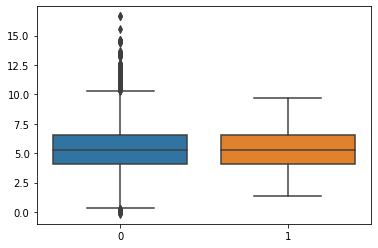

In [87]:
x=data['customer_product_search_score']
y=data1['customer_product_search_score']
sns.boxplot(data=[x,y])
        
    

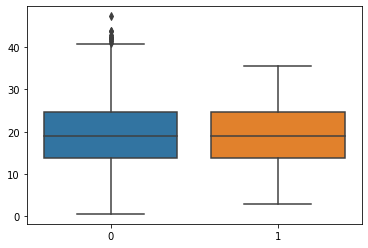

In [88]:
x=data['customer_visit_score']
y=data1['customer_visit_score']
sns.boxplot(data=[x,y])

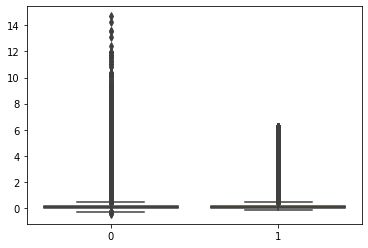

In [34]:
x=data['customer_stay_score']
y=data1['customer_stay_score']
sns.boxplot(data=[x,y])

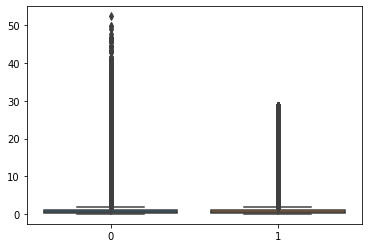

In [35]:
x=data['customer_frequency_score']
y=data1['customer_frequency_score']
sns.boxplot(data=[x,y])

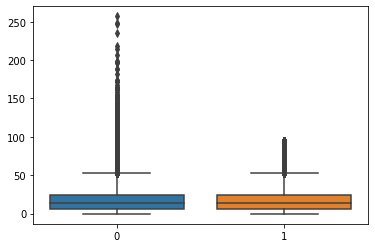

In [36]:
x=data['customer_affinity_score']
y=data1['customer_affinity_score']
sns.boxplot(data=[x,y])

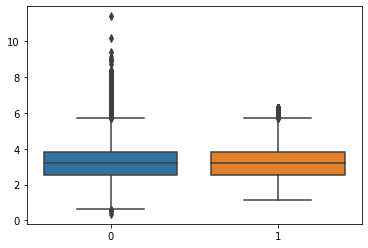

In [37]:
x=data['customer_order_score']
y=data1['customer_order_score']
sns.boxplot(data=[x,y])

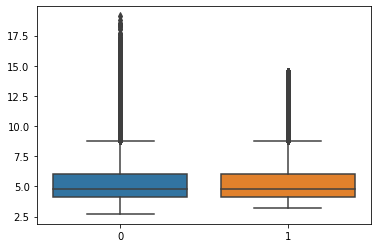

In [39]:
x=data['customer_product_variation_score']
y=data1['customer_product_variation_score']
sns.boxplot(data=[x,y])

In [ ]:
By applying capping technqiue we have somewhat minimized the outliers,but not still upto the point.And as we can see still for some of the variables we are having
skewness positive,we will apply transformations

In [288]:
data1.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,19.305021,5.310931,0.148845,0.286243,2.109245,5.640771,3.207516,17.885738
std,7.175110,1.789688,0.319626,0.951642,4.917008,2.409724,1.012927,17.853300
min,2.997942,1.334948,-0.153655,-0.159820,0.087221,3.185554,1.138116,-0.309251
25%,13.815484,4.053876,0.008413,-0.030214,0.299751,4.155998,2.532039,5.486786
50%,18.974262,5.278014,0.069732,0.032238,0.490587,4.769188,3.175640,13.415359
75%,24.617343,6.543792,0.148614,0.156802,0.971968,6.014290,3.808877,24.265867
max,35.487736,9.668823,1.788112,6.235528,28.575088,14.497373,6.251344,94.527183


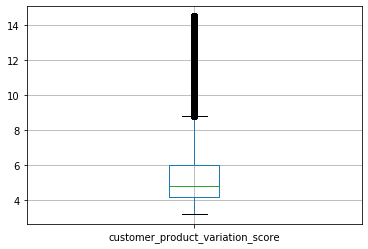

In [49]:
data1.boxplot(column='customer_product_variation_score')

In [50]:
data1.skew()
data1.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,19.305021,5.310931,0.148845,0.286243,2.109245,5.640771,3.207516,17.885738,2.425522,1.799922
std,7.175110,1.789688,0.319626,0.951642,4.917008,2.409724,1.012927,17.853300,0.794292,1.336507
min,2.997942,1.334948,-0.153655,-0.159820,0.087221,3.185554,1.138116,-0.309251,0.000000,0.000000
25%,13.815484,4.053876,0.008413,-0.030214,0.299751,4.155998,2.532039,5.486786,2.000000,1.000000
50%,18.974262,5.278014,0.069732,0.032238,0.490587,4.769188,3.175640,13.415359,2.000000,2.000000
75%,24.617343,6.543792,0.148614,0.156802,0.971968,6.014290,3.808877,24.265867,3.000000,2.000000
max,35.487736,9.668823,1.788112,6.235528,28.575088,14.497373,6.251344,94.527183,4.000000,4.000000


In [347]:
data.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,10738.000000
mean,19.316747,5.319359,0.149960,0.306043,2.180350,5.652268,3.214315,18.192842,2.425522,1.799922,0.120600
std,7.253876,1.839851,0.334059,1.104153,5.362297,2.461882,1.047401,19.644527,0.794292,1.336507,0.325677
min,0.568965,-0.161940,-0.615134,-0.462494,0.022957,2.718819,0.363338,-0.501215,0.000000,0.000000,0.000000
25%,13.815484,4.053876,0.008413,-0.030214,0.299751,4.155998,2.532039,5.486786,2.000000,1.000000,0.000000
50%,18.974262,5.278014,0.069732,0.032238,0.490587,4.769188,3.175640,13.415359,2.000000,2.000000,0.000000
75%,24.617343,6.543792,0.148614,0.156802,0.971968,6.014290,3.808877,24.265867,3.000000,2.000000,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,19.095799,11.388305,257.251810,4.000000,4.000000,1.000000


In [24]:
from scipy.stats import yeojohnson
for col in data1.columns:
    data1[col],lam=yeojohnson(data1[col])

In [25]:
data1.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,13.223736,4.271583,0.060992,0.048809,0.328570,0.500127,2.011267,3.780546
std,4.298673,1.292927,0.091471,0.120207,0.151021,0.007102,0.470102,2.146963
min,2.593631,1.225013,-0.217229,-0.221688,0.078348,0.484415,0.910939,-0.343090
25%,10.020483,3.385413,0.008256,-0.032147,0.214754,0.495164,1.714661,2.441269
50%,13.166302,4.281965,0.060049,0.030216,0.296261,0.499391,2.027033,3.929959
75%,16.449037,5.176387,0.109802,0.117166,0.416883,0.504869,2.310030,5.188760
max,22.445715,7.279320,0.277930,0.321293,0.631391,0.514219,3.246795,9.070664


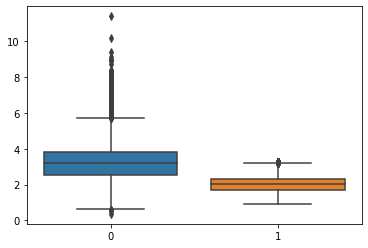

In [93]:
x=data['customer_order_score']
y=data1['customer_order_score']
sns.boxplot(data=[x,y])

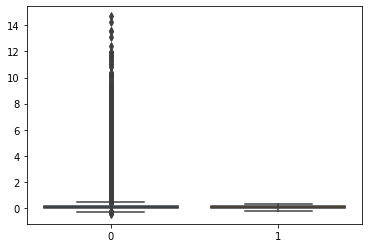

In [94]:
x=data['customer_stay_score']
y=data1['customer_stay_score']
sns.boxplot(data=[x,y])

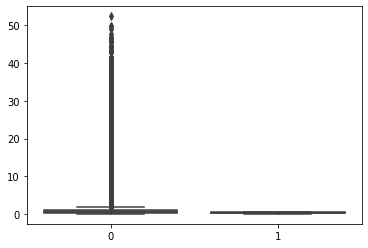

In [95]:
x=data['customer_frequency_score']
y=data1['customer_frequency_score']
sns.boxplot(data=[x,y])

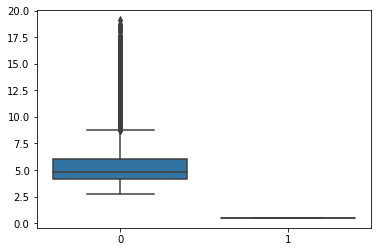

In [96]:
x=data['customer_product_variation_score']
y=data1['customer_product_variation_score']
sns.boxplot(data=[x,y])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E46C628C8>]],
      dtype=object)

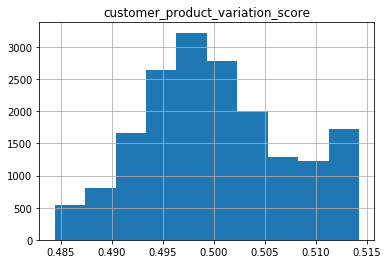

In [97]:
data1.hist(column='customer_product_variation_score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E46CEF488>]],
      dtype=object)

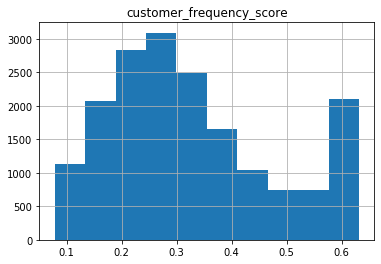

In [98]:
data1.hist(column='customer_frequency_score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E47DCA408>]],
      dtype=object)

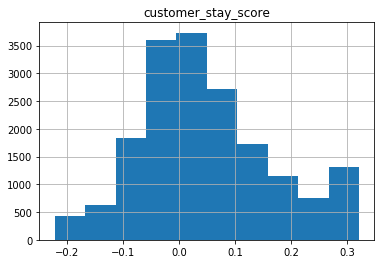

In [100]:
data1.hist(column='customer_stay_score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E47D41F08>]],
      dtype=object)

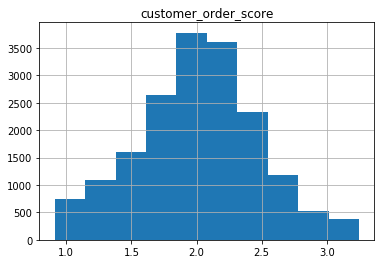

In [99]:
data1.hist(column='customer_order_score')

<Figure size 14400x576 with 0 Axes>

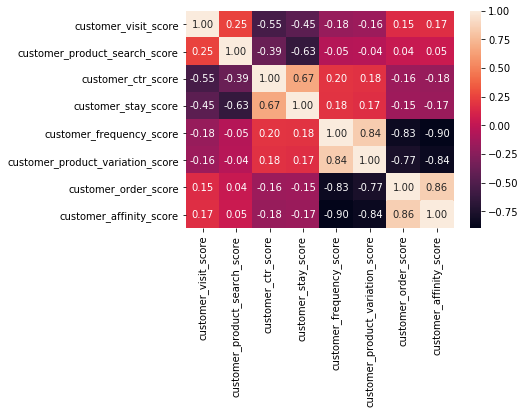

<Figure size 14400x576 with 0 Axes>

In [101]:
# Correlation plot ,now again we will see
sns.heatmap(data1.corr(),annot=True,fmt=".2f") 
plt.figure(figsize=(200,8))

In [108]:
data1.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,13.223736,4.271583,0.060992,0.048809,0.328570,0.500127,2.011267,3.780546
std,4.298673,1.292927,0.091471,0.120207,0.151021,0.007102,0.470102,2.146963
min,2.593631,1.225013,-0.217229,-0.221688,0.078348,0.484415,0.910939,-0.343090
25%,10.020483,3.385413,0.008256,-0.032147,0.214754,0.495164,1.714661,2.441269
50%,13.166302,4.281965,0.060049,0.030216,0.296261,0.499391,2.027033,3.929959
75%,16.449037,5.176387,0.109802,0.117166,0.416883,0.504869,2.310030,5.188760
max,22.445715,7.279320,0.277930,0.321293,0.631391,0.514219,3.246795,9.070664


In [26]:
frames= [data3,data1,data2,data4]
data =pd.concat(frames,axis=1)
data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
0,csid_1,9.613511,7.134551,-0.082236,-0.185726,0.276154,0.499014,1.717681,3.004473,3,4,0.0,train
1,csid_2,12.037626,5.717521,0.112291,-0.126821,0.252719,0.495558,2.472201,4.467889,3,0,0.0,train
2,csid_3,12.286693,4.185228,0.085359,0.166000,0.268433,0.497564,2.340094,3.809350,3,2,0.0,train
3,csid_4,20.245731,4.021664,-0.021168,-0.123547,0.378345,0.500947,1.803368,2.256056,1,4,0.0,train
4,csid_5,8.812261,3.521876,0.129009,0.125766,0.133744,0.487975,2.252981,7.427520,3,1,0.0,train


In [112]:
data.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,10738.000000
mean,13.223736,4.271583,0.060992,0.048809,0.328570,0.500127,2.011267,3.780546,2.425522,1.799922,0.120600
std,4.298673,1.292927,0.091471,0.120207,0.151021,0.007102,0.470102,2.146963,0.794292,1.336507,0.325677
min,2.593631,1.225013,-0.217229,-0.221688,0.078348,0.484415,0.910939,-0.343090,0.000000,0.000000,0.000000
25%,10.020483,3.385413,0.008256,-0.032147,0.214754,0.495164,1.714661,2.441269,2.000000,1.000000,0.000000
50%,13.166302,4.281965,0.060049,0.030216,0.296261,0.499391,2.027033,3.929959,2.000000,2.000000,0.000000
75%,16.449037,5.176387,0.109802,0.117166,0.416883,0.504869,2.310030,5.188760,3.000000,2.000000,0.000000
max,22.445715,7.279320,0.277930,0.321293,0.631391,0.514219,3.246795,9.070664,4.000000,4.000000,1.000000


In [ ]:
Now that all the data has been pre processed , we will separate the train and test data and we will export those into csv files

In [27]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


In [352]:
train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
0,csid_1,9.613511,7.134551,-0.082236,-0.185726,0.276154,0.499014,1.717681,3.004473,3,4,0.0,train
1,csid_2,12.037626,5.717521,0.112291,-0.126821,0.252719,0.495558,2.472201,4.467889,3,0,0.0,train
2,csid_3,12.286693,4.185228,0.085359,0.166000,0.268433,0.497564,2.340094,3.809350,3,2,0.0,train
3,csid_4,20.245731,4.021664,-0.021168,-0.123547,0.378345,0.500947,1.803368,2.256056,1,4,0.0,train
4,csid_5,8.812261,3.521876,0.129009,0.125766,0.133744,0.487975,2.252981,7.427520,3,1,0.0,train


In [116]:
test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category,source
10738,csid_10739,15.233789,3.120875,0.092844,0.077878,0.356784,0.504084,2.283732,2.943165,2,2,NaN,test
10739,csid_10740,9.649821,3.043472,0.100014,0.048179,0.120343,0.493301,2.161103,6.013580,2,1,NaN,test
10740,csid_10741,10.511900,4.142167,-0.004700,-0.039108,0.231472,0.495943,2.330241,5.974515,2,1,NaN,test
10741,csid_10742,17.317823,2.601588,0.147192,0.141363,0.580345,0.507418,1.627339,0.634674,2,2,NaN,test
10742,csid_10743,13.662081,4.096120,-0.011641,-0.030531,0.208098,0.498266,2.074553,4.156469,3,2,NaN,test


In [28]:
train.drop(['source'],axis=1,inplace=True)

C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,9.613511,7.134551,-0.082236,-0.185726,0.276154,0.499014,1.717681,3.004473,3,4,0.0
1,csid_2,12.037626,5.717521,0.112291,-0.126821,0.252719,0.495558,2.472201,4.467889,3,0,0.0
2,csid_3,12.286693,4.185228,0.085359,0.166000,0.268433,0.497564,2.340094,3.809350,3,2,0.0
3,csid_4,20.245731,4.021664,-0.021168,-0.123547,0.378345,0.500947,1.803368,2.256056,1,4,0.0
4,csid_5,8.812261,3.521876,0.129009,0.125766,0.133744,0.487975,2.252981,7.427520,3,1,0.0


In [30]:
test.drop(['customer_category','source'],axis=1,inplace=True)

C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
10738,csid_10739,15.233789,3.120875,0.092844,0.077878,0.356784,0.504084,2.283732,2.943165,2,2
10739,csid_10740,9.649821,3.043472,0.100014,0.048179,0.120343,0.493301,2.161103,6.013580,2,1
10740,csid_10741,10.511900,4.142167,-0.004700,-0.039108,0.231472,0.495943,2.330241,5.974515,2,1
10741,csid_10742,17.317823,2.601588,0.147192,0.141363,0.580345,0.507418,1.627339,0.634674,2,2
10742,csid_10743,13.662081,4.096120,-0.011641,-0.030531,0.208098,0.498266,2.074553,4.156469,3,2


In [ ]:
We have imbalanced data set as observed in the starting,so to balance the data set we will be applying smorting technique

In [31]:
Predictors=train[['customer_visit_score','customer_product_search_score','customer_ctr_score','customer_stay_score',
                'customer_frequency_score','customer_product_variation_score','customer_order_score','customer_affinity_score','customer_active_segment','X1']]
Target    =train[['customer_category']]

In [127]:
Predictors.shape

(10738, 11)

In [266]:
print(Predictors)

       customer_visit_score  customer_product_search_score  \
0                  9.613511                       7.134551   
1                 12.037626                       5.717521   
2                 12.286693                       4.185228   
3                 20.245731                       4.021664   
4                  8.812261                       3.521876   
...                     ...                            ...   
10733             15.909008                       5.285856   
10734             17.048423                       5.144385   
10735             20.384271                       6.037539   
10736             18.601416                       4.504001   
10737             14.163823                       3.700265   

       customer_ctr_score  customer_stay_score  customer_frequency_score  \
0               -0.082236            -0.185726                  0.276154   
1                0.112291            -0.126821                  0.252719   
2                0.085359  

In [128]:
Target.shape

(10738, 1)

In [32]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(Predictors, Target, test_size = 0.3, random_state = 0) 
  

In [360]:
X_train.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
6138,10.784864,3.360728,-0.021001,-0.008701,0.319842,0.490755,2.045107,3.463733,2,2
9588,11.812303,3.601929,0.124304,0.065244,0.187000,0.498423,2.565185,6.568224,2,1
2110,11.488306,2.901100,0.101409,0.054861,0.182481,0.499207,1.859721,5.029892,3,0
4982,22.445715,3.060486,-0.140389,-0.000023,0.215330,0.494195,1.993327,4.641744,0,0
3460,15.862950,4.124492,0.046272,-0.119289,0.371958,0.502189,1.600504,2.974694,2,2


In [235]:
X_train.shape

(7516, 10)

In [236]:
X_test.shape

(3222, 10)

In [237]:
y_train.shape

(7516, 1)

In [238]:
(y_train ==0).value_counts()

customer_category
True                 6585
False                 931
dtype: int64

In [239]:
y_train[y_train['customer_category']==1].value_counts()

customer_category
1.0                  931
dtype: int64

In [240]:
y_train.head()

,customer_category
6138,0.0
9588,1.0
2110,0.0
4982,0.0
3460,0.0


In [241]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7516 entries, 6138 to 2732
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_category  7516 non-null   float64
dtypes: float64(1)
memory usage: 117.4 KB


In [33]:
import imblearn
from imblearn.over_sampling import SMOTE 



sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = (sm.fit_resample(X_train.to_numpy(), y_train) )
  


In [364]:
print(X_train_res)

[[ 1.07848635e+01  3.36072758e+00 -2.10010594e-02 ...  3.46373311e+00
   2.00000000e+00  2.00000000e+00]
 [ 1.18123033e+01  3.60192918e+00  1.24303559e-01 ...  6.56822386e+00
   2.00000000e+00  1.00000000e+00]
 [ 1.14883062e+01  2.90109995e+00  1.01409115e-01 ...  5.02989227e+00
   3.00000000e+00  0.00000000e+00]
 ...
 [ 2.59363122e+00  1.25647326e+00  2.77677046e-01 ... -1.17361818e-02
   4.00000000e+00  2.00000000e+00]
 [ 1.19004634e+01  1.86784051e+00  2.29520747e-01 ...  1.16686977e+00
   3.00000000e+00  4.00000000e+00]
 [ 3.84035315e+00  2.46387103e+00  2.76662334e-01 ...  1.89218465e-01
   4.00000000e+00  2.00000000e+00]]


In [365]:
X_test.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
247,17.398101,6.360264,0.048211,-0.221688,0.437728,0.504467,1.478308,1.622944,3,2
9734,12.254276,3.962116,0.100363,0.041823,0.113969,0.499741,2.497240,7.071447,3,1
7170,21.237311,4.117437,0.071823,-0.010749,0.457195,0.508165,2.028202,1.821902,0,4
3025,14.374116,2.076023,0.062316,0.104845,0.293219,0.489782,2.616328,6.514998,3,1
2958,8.156298,5.097319,0.014834,-0.061449,0.078348,0.484415,2.815064,8.003304,2,1


In [34]:
print("Before OverSampling, counts of label '1': {}".format((y_train == 1).value_counts())) 
print("After  OverSampling, counts of label '1': {}".format(((y_train_res==1).value_counts())))
print("After  OverSampling, counts of label '0': {}".format(((y_train_res==0).value_counts())))

Before OverSampling, counts of label '1': customer_category
False                6585
True                  931
dtype: int64
After  OverSampling, counts of label '1': customer_category
True                 6585
False                6585
dtype: int64
After  OverSampling, counts of label '0': customer_category
True                 6585
False                6585
dtype: int64


In [195]:
y_train_res.head()
y_train_res.shape

(13170, 1)

In [181]:
print(y_train_res)

       customer_category
0                    0.0
1                    1.0
2                    0.0
3                    0.0
4                    0.0
...                  ...
13165                1.0
13166                1.0
13167                1.0
13168                1.0
13169                1.0

[13170 rows x 1 columns]


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [36]:
dt = DecisionTreeClassifier()
dt=dt.fit(X_train_res, y_train_res)


In [37]:
y_pred=dt.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [38]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      2858
         1.0       0.65      0.87      0.75       364

    accuracy                           0.93      3222
   macro avg       0.82      0.91      0.85      3222
weighted avg       0.95      0.93      0.94      3222



In [371]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2702  156]
 [  52  312]]


Text(0.5, 1, 'Accuracy Score: 0.9335816263190565')

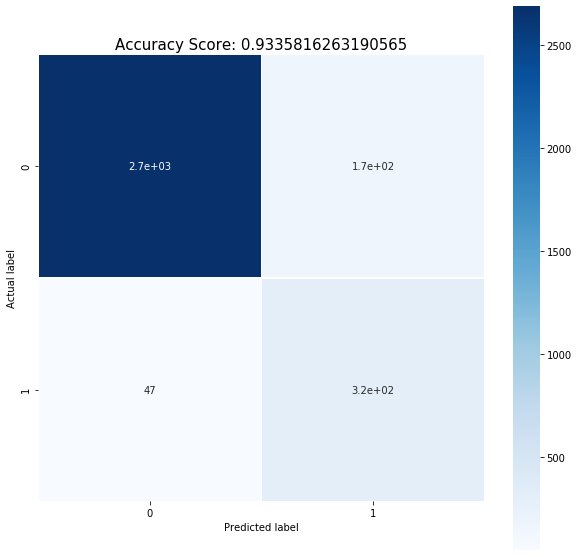

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.1, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

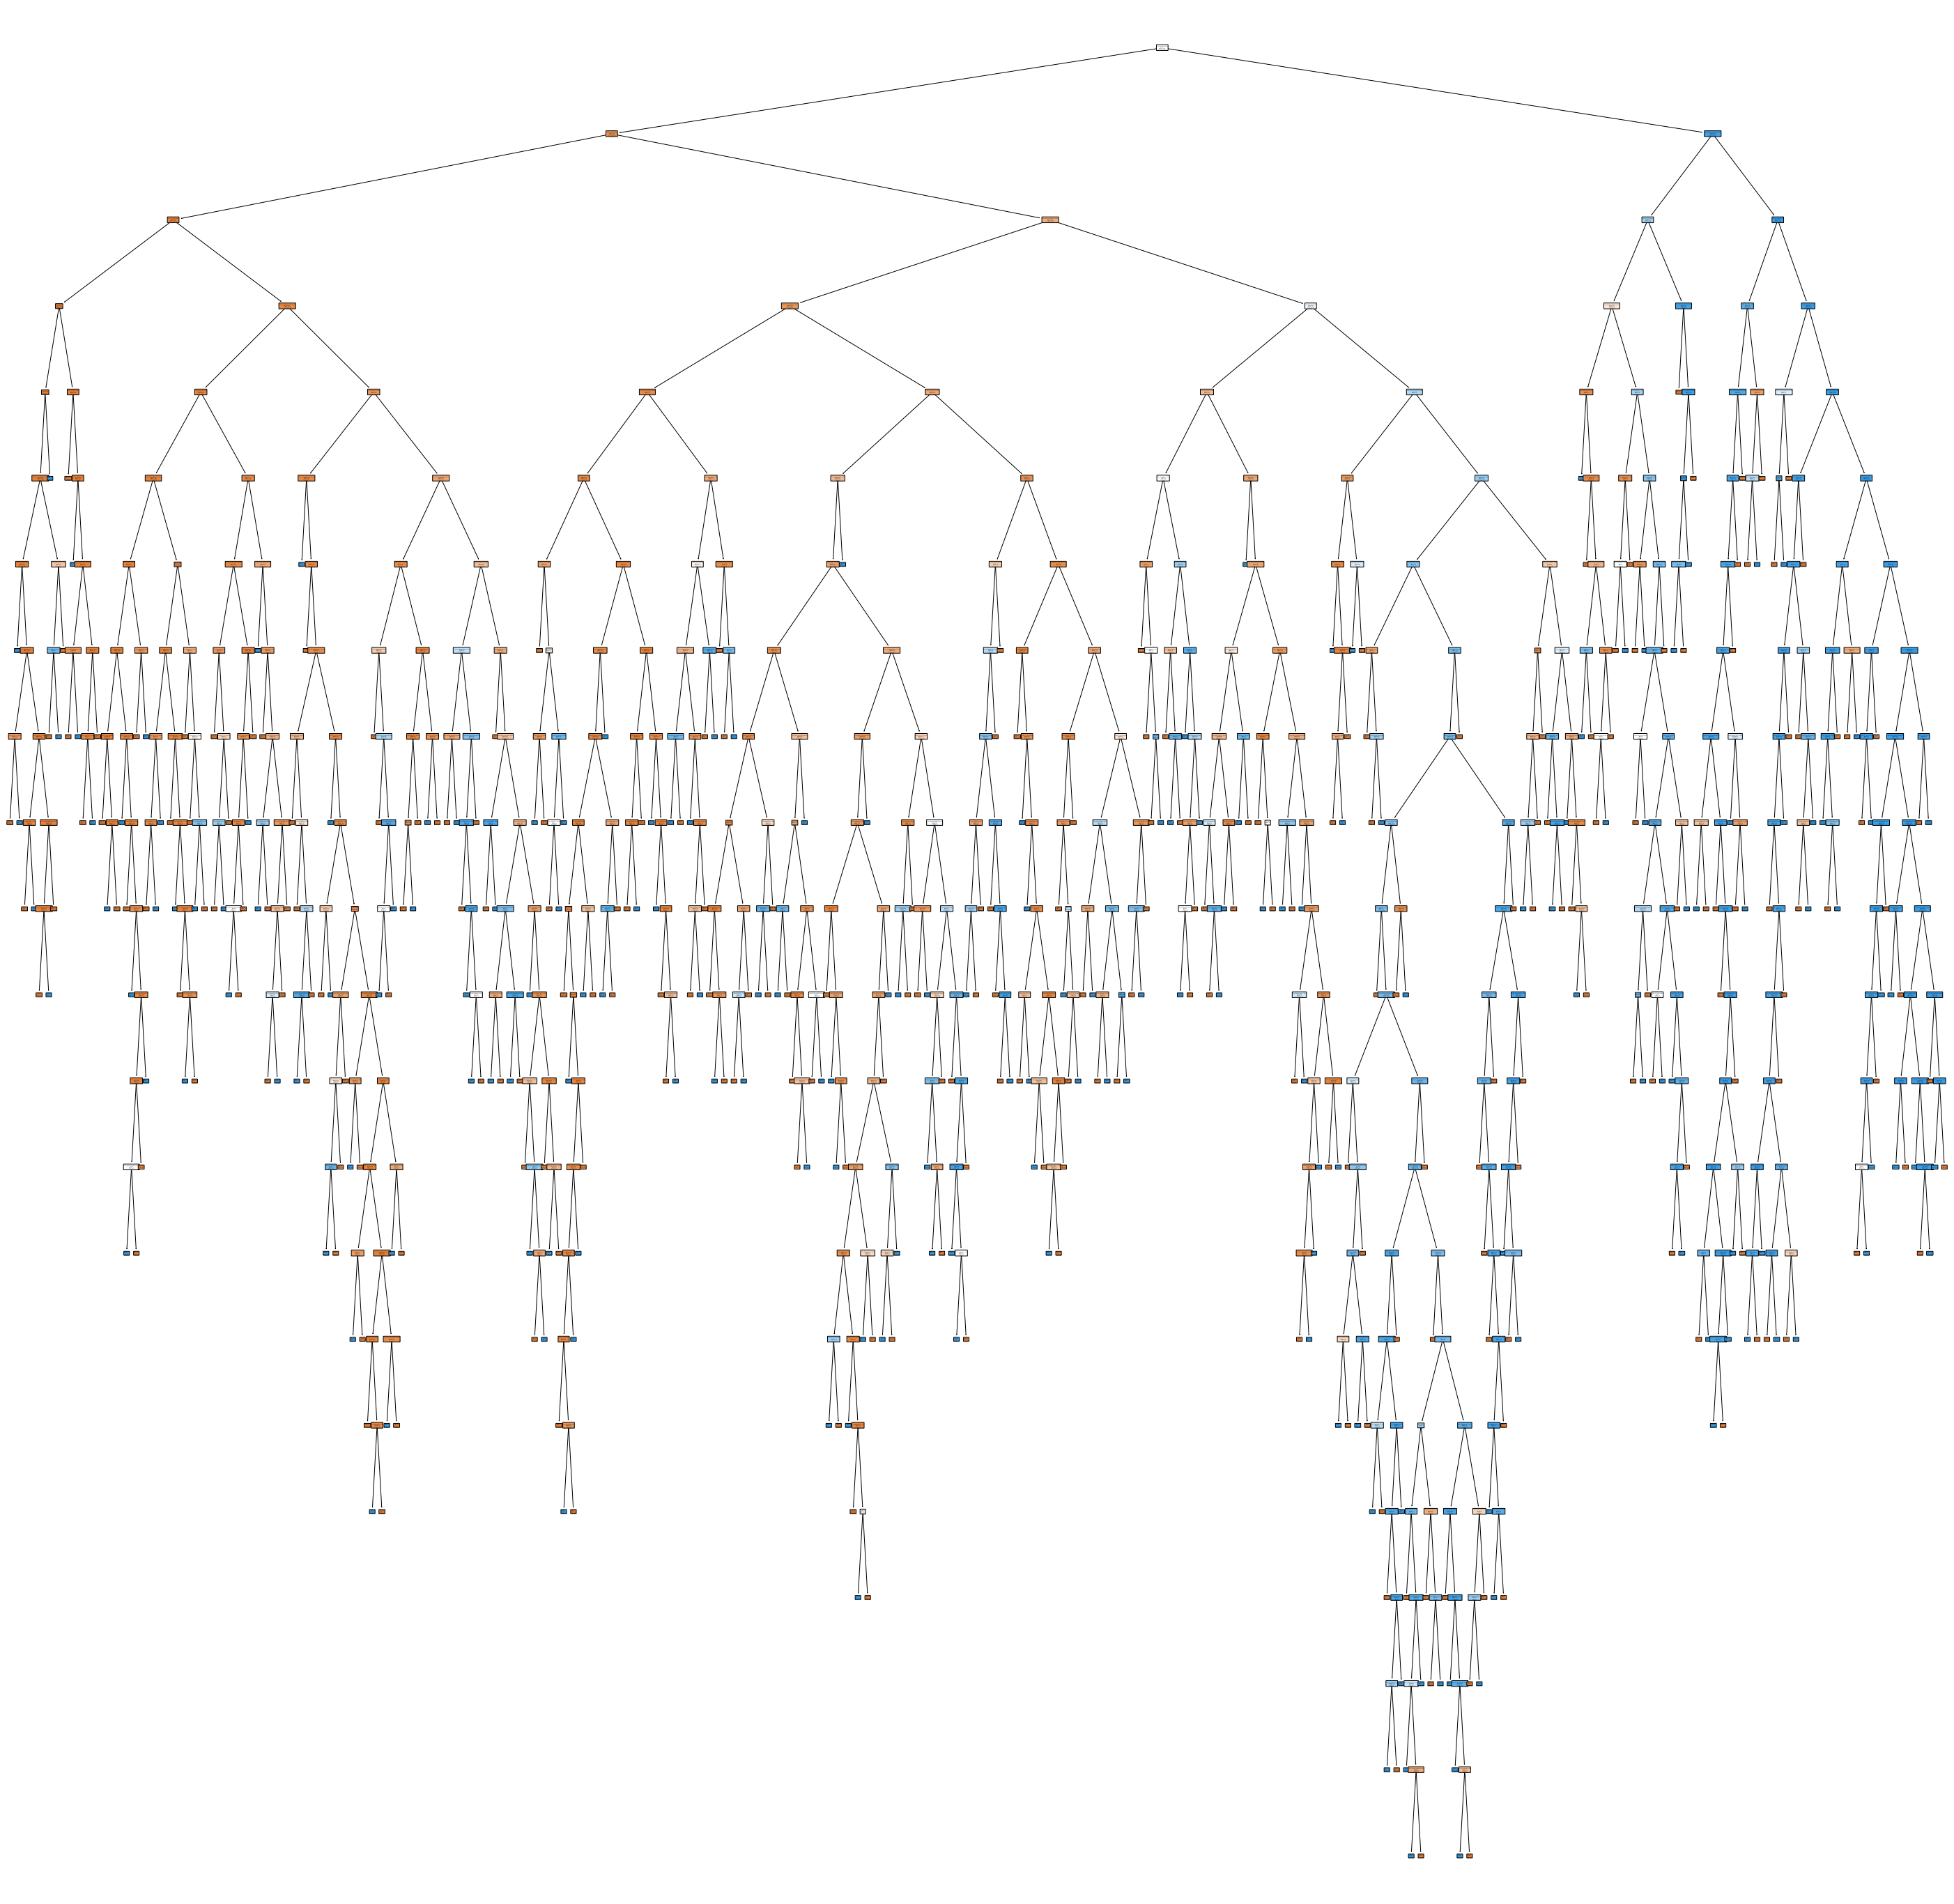

In [374]:
plt.figure(figsize=(50,50))
dec_tree = plot_tree(decision_tree=dt, feature_names =Predictors.columns , 
                     class_names =["0", "1"] , filled = True , precision = 5, rounded = True)

[Text(199.08892432972718, 211.7178947368421, 'X[2] <= 0.165\ngini = 0.5\nsamples = 13170\nvalue = [6585, 6585]'),
 Text(104.14436147695203, 200.2736842105263, 'X[2] <= 0.088\ngini = 0.19\nsamples = 7192\nvalue = [6426, 766]'),
 Text(29.046642756349954, 188.82947368421054, 'X[2] <= 0.041\ngini = 0.063\nsamples = 4851\nvalue = [4693, 158]'),
 Text(9.343744120413923, 177.38526315789474, 'X[9] <= 1.91\ngini = 0.017\nsamples = 2855\nvalue = [2831, 24]'),
 Text(6.929068673565381, 165.94105263157894, 'X[9] <= 1.14\ngini = 0.038\nsamples = 1070\nvalue = [1049, 21]'),
 Text(6.089181561618062, 154.49684210526317, 'X[5] <= 0.505\ngini = 0.028\nsamples = 1064\nvalue = [1049, 15]'),
 Text(2.939604891815616, 143.05263157894737, 'X[7] <= 3.358\ngini = 0.015\nsamples = 1044\nvalue = [1036, 8]'),
 Text(2.099717779868297, 131.60842105263157, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(3.779492003762935, 131.60842105263157, 'X[7] <= 3.469\ngini = 0.011\nsamples = 1042\nvalue = [1036, 6]'),
 Text(1.

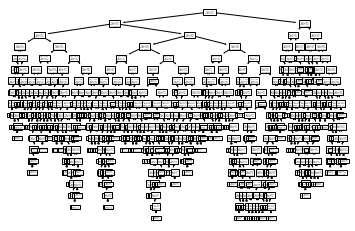

In [44]:
from sklearn import tree
tree.plot_tree(dt)

In [61]:
test1=test.iloc[:,0:1]
print(test1)

      customer_id
10738  csid_10739
10739  csid_10740
10740  csid_10741
10741  csid_10742
10742  csid_10743
...           ...
17893  csid_17894
17894  csid_17895
17895  csid_17896
17896  csid_17897
17897  csid_17898

[7160 rows x 1 columns]


In [62]:
test2=test.iloc[:,1:]
print(test2)

       customer_visit_score  customer_product_search_score  \
10738             15.233789                       3.120875   
10739              9.649821                       3.043472   
10740             10.511900                       4.142167   
10741             17.317823                       2.601588   
10742             13.662081                       4.096120   
...                     ...                            ...   
17893             12.682732                       5.657200   
17894             16.873232                       3.995005   
17895              8.329304                       4.095729   
17896             12.066088                       7.017224   
17897              8.028830                       7.279320   

       customer_ctr_score  customer_stay_score  customer_frequency_score  \
10738            0.092844             0.077878                  0.356784   
10739            0.100014             0.048179                  0.120343   
10740           -0.004700  

In [377]:
test['customer_category']=dt.predict(test2)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [378]:
test['customer_category']

10738    0.0
10739    0.0
10740    0.0
10741    0.0
10742    0.0
        ... 
17893    0.0
17894    0.0
17895    0.0
17896    0.0
17897    1.0
Name: customer_category, Length: 7160, dtype: float64

In [386]:
testDecisionTree=test[['customer_id','customer_category']]
print(testDecisionTree)

      customer_id  customer_category
10738  csid_10739                0.0
10739  csid_10740                0.0
10740  csid_10741                0.0
10741  csid_10742                0.0
10742  csid_10743                0.0
...           ...                ...
17893  csid_17894                0.0
17894  csid_17895                0.0
17895  csid_17896                0.0
17896  csid_17897                0.0
17897  csid_17898                1.0

[7160 rows x 2 columns]


In [ ]:
Export to Excel Decision Tree

In [387]:
testDecisionTree.to_csv("testDecisionTree.csv",index=False)

In [ ]:
                                               Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

rf.fit(X_train_res, y_train_res)


C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(n_estimators=1000, random_state=42)

In [44]:
y_pred1=rf.predict(X_test)
y_pred1

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
cm=confusion_matrix(y_test,y_pred1)
print(cm)

[[2810   48]
 [  42  322]]


In [50]:
rf.score(X_train_res, y_train_res)

1.0

Text(0.5, 1, 'Accuracy Score: 0.9720670391061452')

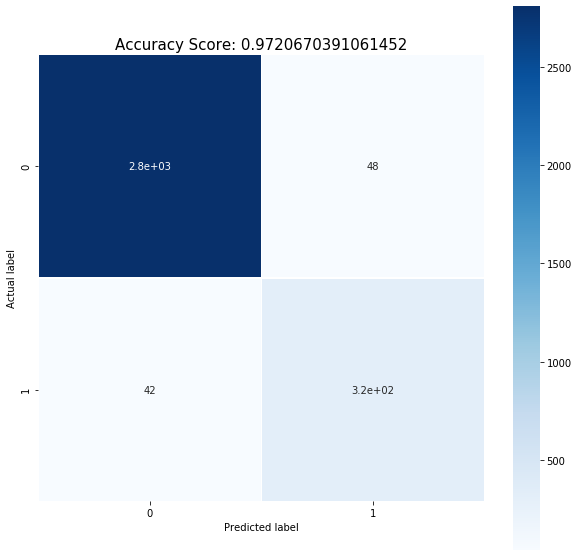

In [69]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.1, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [52]:
rf.get_params,rf.feature_importances_

(<bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=1000, random_state=42)>,
 array([0.04272288, 0.02849945, 0.37067925, 0.20091716, 0.10507141,
        0.10469104, 0.04368808, 0.07034867, 0.0232871 , 0.01009496]))

<BarContainer object of 10 artists>

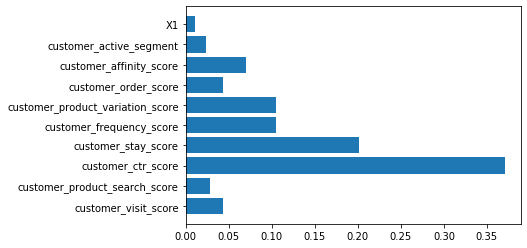

In [54]:
import matplotlib.pyplot as plt
plt.barh(Predictors.columns, rf.feature_importances_)

In [ ]:
Plotting sorted feature importance plot

Text(0.5, 0, 'Random Forest Feature Importance')

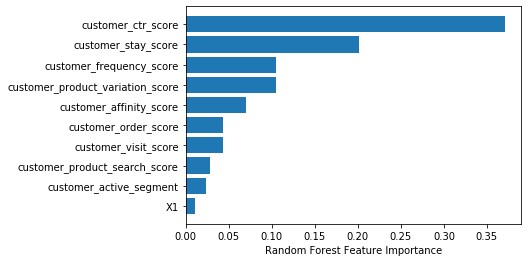

In [55]:
sorted_idx=rf.feature_importances_.argsort()
plt.barh(Predictors.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [57]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

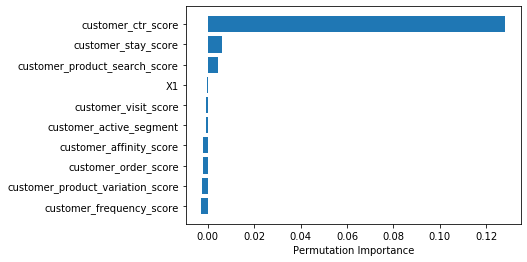

In [59]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(Predictors.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [63]:
test1['customer_category']=rf.predict(test2)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
testRandomForest=test1[['customer_id','customer_category']]
print(testRandomForest)

      customer_id  customer_category
10738  csid_10739                0.0
10739  csid_10740                0.0
10740  csid_10741                0.0
10741  csid_10742                0.0
10742  csid_10743                0.0
...           ...                ...
17893  csid_17894                0.0
17894  csid_17895                0.0
17895  csid_17896                0.0
17896  csid_17897                0.0
17897  csid_17898                1.0

[7160 rows x 2 columns]


In [67]:
testRandomForest.to_csv("testRandomForest.csv",index=False)